In [3]:
!pip install scikit-fuzzy

     -------------------------------------- 994.0/994.0 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894075 sha256=7e75fe3fc6548cb9405bfb00c0695184630f9349497c43ac23ec0b56b339e5b6
  Stored in directory: c:\users\maria\appdata\local\pip\cache\wheels\32\2c\a1\a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


In [5]:
#Importar librerías
import numpy as np
import skfuzzy
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
import warnings
warnings.filterwarnings('ignore')

In [6]:
#Declarar el universo de discurso
#Velocidad del avión
velocidad = ctrl.Antecedent(np.arange(0, 1001, 1), 'velocidad')
#Ángulo de turbulencia
angulo = ctrl.Antecedent(np.arange(-10, 11, 0.1), 'angulo')
#Posición del timón
posicion = ctrl.Consequent(np.arange(0, 11, 1), 'posicion')

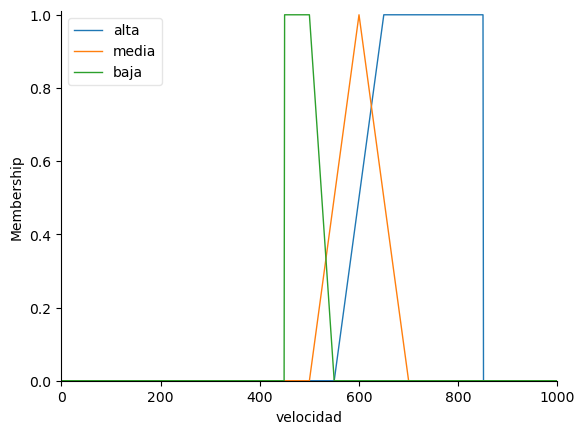

In [7]:
#Crear conjuntos borrosos
#Velocidad del avión
velocidad['alta'] = skfuzzy.trapmf(velocidad.universe, [550, 650, 850, 850])
velocidad['media'] = skfuzzy.trimf(velocidad.universe, [500, 600, 700])
velocidad['baja'] = skfuzzy.trapmf(velocidad.universe, [450, 450, 500, 550])

velocidad.view()
plt.show()

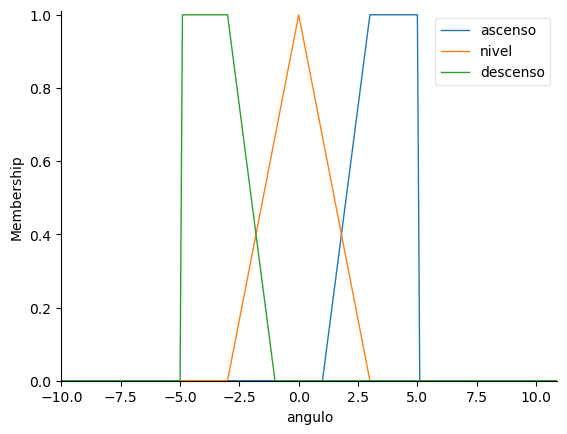

In [9]:
#Ángulo de turbulencia 
angulo['ascenso'] = skfuzzy.trapmf(angulo.universe, [1, 3, 5, 5])
angulo['nivel'] = skfuzzy.trimf(angulo.universe, [-3, 0, 3])
angulo['descenso'] = skfuzzy.trapmf(angulo.universe, [-5, -5, -3, -1])

angulo.view()
plt.show()

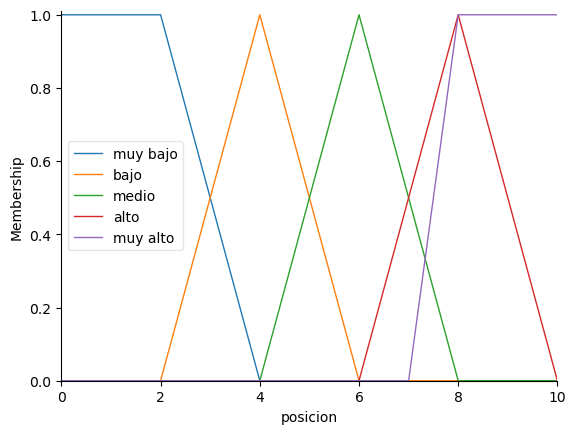

In [12]:
#Posición del timón
posicion['muy bajo'] = skfuzzy.trapmf(posicion.universe, [0, 0, 2, 4])
posicion['bajo'] = skfuzzy.trimf(posicion.universe, [2, 4, 6])
posicion['medio'] = skfuzzy.trimf(posicion.universe, [4, 6, 8])
posicion['alto'] = skfuzzy.trimf(posicion.universe, [6, 8, 10])
posicion['muy alto'] = skfuzzy.trapmf(posicion.universe, [7, 8, 10, 10])

posicion.view()
plt.show()

In [13]:
#Motor de reglas de motor de inferencia
regla1 = ctrl.Rule(velocidad['alta'] & angulo['ascenso'], posicion['bajo'])
regla2 = ctrl.Rule(velocidad['alta'] & angulo['nivel'], posicion['bajo'])
regla3 = ctrl.Rule(velocidad['alta'] & angulo['descenso'], posicion['alto'])
regla4 = ctrl.Rule(velocidad['media'] & angulo['ascenso'], posicion['medio'])
regla5 = ctrl.Rule(velocidad['media'] & angulo['nivel'], posicion['medio'])
regla6 = ctrl.Rule(velocidad['media'] & angulo['descenso'], posicion['alto'])
regla7 = ctrl.Rule(velocidad['baja'] & angulo['ascenso'], posicion['muy bajo'])
regla8 = ctrl.Rule(velocidad['baja'] & angulo['nivel'], posicion['medio'])
regla9 = ctrl.Rule(velocidad['baja'] & angulo['descenso'], posicion['muy alto'])

In [14]:
#Activar el motor de inferencia
controlVuelo = ctrl.ControlSystem([regla1, regla2, regla3,
                                  regla4, regla5, regla6,
                                  regla7, regla8, regla9])

In [18]:
#Implementar ejercicio 1
#Velocidad = 515 km/h
#Ángulo = -2.5
posicionTimon = ctrl.ControlSystemSimulation(controlVuelo)
posicionTimon.input['velocidad'] = 515
posicionTimon.input['angulo'] = -2.5
posicionTimon.compute()

In [20]:
posicionTimon.output['posicion']

8.022095282505633

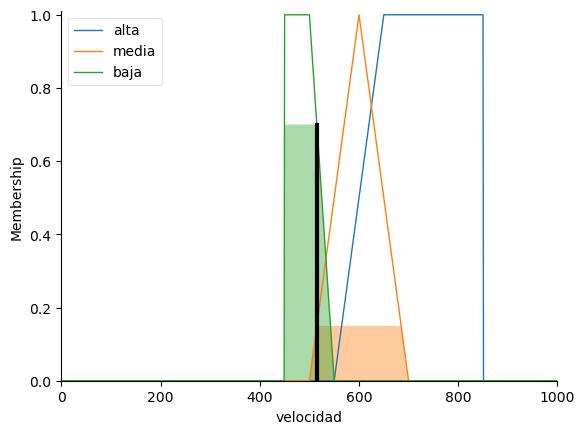

In [21]:
#Reglas activadas
velocidad.view(sim = posicionTimon)
plt.show()

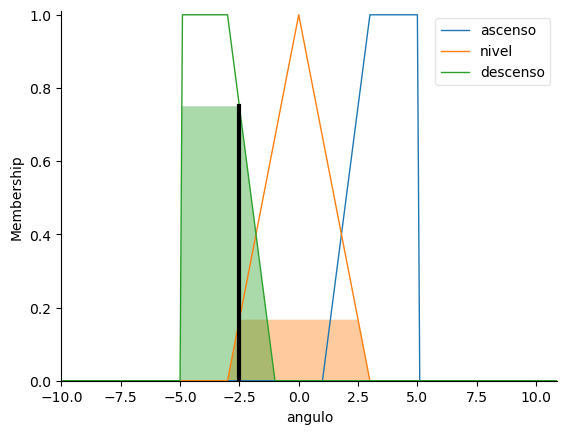

In [22]:
angulo.view(sim = posicionTimon)
plt.show()

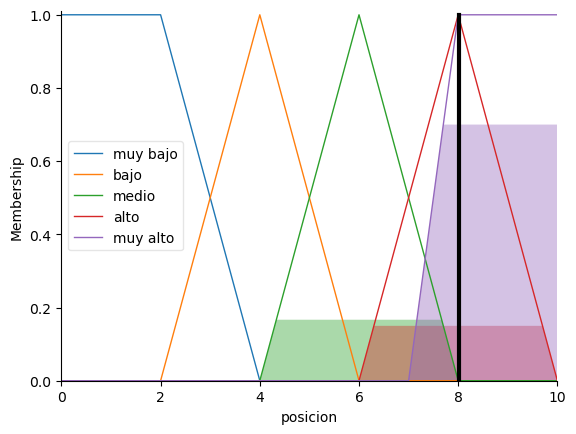

In [23]:
posicion.view(sim = posicionTimon)

In [24]:
#Implementar ejercicio 2
#Velocidad = 700 km/h
#Ángulo = 3
posicionTimon = ctrl.ControlSystemSimulation(controlVuelo)
posicionTimon.input['velocidad'] = 700
posicionTimon.input['angulo'] = 3
posicionTimon.compute()

In [25]:
posicionTimon.output['posicion']

3.9999999999999996

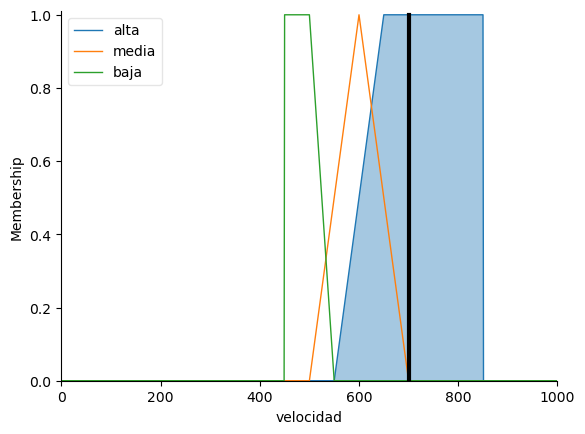

In [26]:
#Reglas activadas
velocidad.view(sim = posicionTimon)
plt.show()

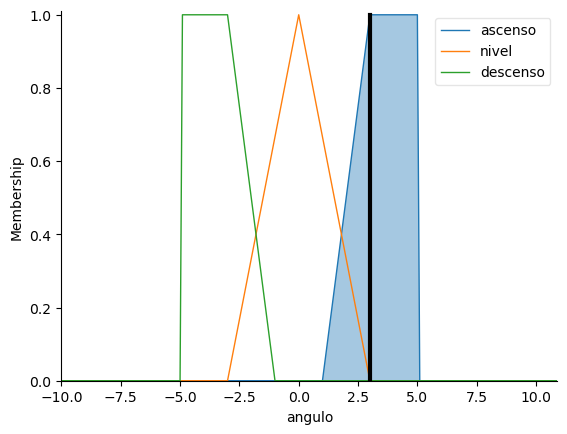

In [27]:
angulo.view(sim = posicionTimon)
plt.show()

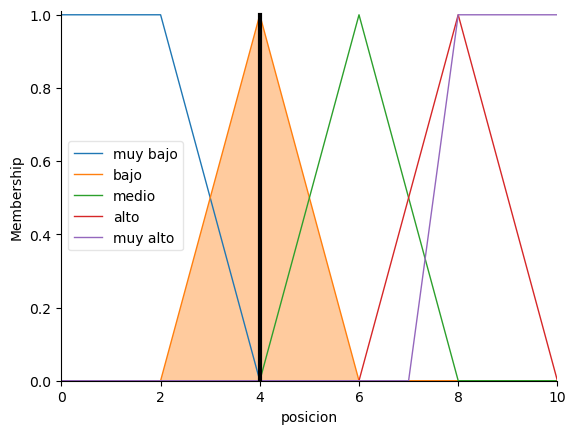

In [29]:
posicion.view(sim = posicionTimon)